In [2]:
import pickle
import csv
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
os.chdir(current_wd)

In [3]:
results_folder = project_folder_path + 'results\\monkey\\'

In [4]:
fig_folder = project_folder_path + 'results\\monkey\\fig_drafts_paper\\'
save_fig = True

### Load data

In [49]:
csv_data_file_pfdl = results_folder + 'data_pfdl_fixon_1000ms_with_empty_fixation.csv'
with open(csv_data_file_pfdl, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfdl = list(reader)
    
n_spike_trains_pfdl = len(sua_list_pfdl)
print('N spike_trains in PFdl fixON {}'.format(n_spike_trains_pfdl))

N spike_trains in PFdl fixON 47339


In [50]:
csv_data_file_pfp = results_folder + 'data_pfp_fixon_1000ms_with_empty_fixation.csv'
with open(csv_data_file_pfp, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfp = list(reader)

n_spike_trains_pfp = len(sua_list_pfp)
print('N spike_trains in PFp fixON {}'.format(n_spike_trains_pfp))

N spike_trains in PFp fixON 43677


### Get the FR

In [51]:
def get_fr_df(sua_list):
    unit_id_l, trial_id_l, condition_id_l, spike_count_l, fr_hz_l = [], [], [], [], []    
    
    for unit in sua_list:
        unit_id_l.append(unit[0])
        trial_id_l.append(unit[1])
        condition_id_l.append(unit[2])
        spike_count_l.append(unit[3])
        fr_hz_l.append(unit[4])

    df = pd.DataFrame({
        'unit_id': unit_id_l,
        'trial_id': trial_id_l,
        'condition_id': condition_id_l,
        'spike_count': spike_count_l,
        'fr_hz': fr_hz_l
    })
    for col in df.keys():
        df[col] = df[col].astype(float)
    return df

In [52]:
fr_pfdl_df = get_fr_df(sua_list_pfdl)
fr_pfp_df = get_fr_df(sua_list_pfdl)

# unit mean
fr_pfdl_df_mean = fr_pfdl_df.groupby(by='unit_id', as_index=False)[['spike_count', 'fr_hz']].mean()
fr_pfdl_df_mean['fr_hz_log10'] = np.log10(fr_pfdl_df_mean['fr_hz'])
fr_pfdl_df_mean['area'] = 'pfdl'

fr_pfp_df_mean = fr_pfp_df.groupby(by='unit_id', as_index=False)[['spike_count', 'fr_hz']].mean()
fr_pfp_df_mean['fr_hz_log10'] = np.log10(fr_pfp_df_mean['fr_hz'])
fr_pfp_df_mean['area'] = 'pfp'

C:\Users\ipochino\.conda\envs\isttc\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ipochino\.conda\envs\isttc\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
fr_mean_df = pd.concat([fr_pfdl_df_mean, fr_pfp_df_mean])
fr_mean_df.reset_index(inplace=True, drop=True)
fr_mean_df

,unit_id,spike_count,fr_hz,fr_hz_log10,area
0,0.0,19.423913,19.423913,1.288337,pfdl
1,1.0,0.543478,0.543478,-0.264818,pfdl
2,2.0,1.184783,1.184783,0.073639,pfdl
3,3.0,10.913043,10.913043,1.037946,pfdl
4,4.0,2.816000,2.816000,0.449633,pfdl
...,...,...,...,...,...
1083,539.0,2.268817,2.268817,0.355800,pfp
1084,540.0,1.009346,1.009346,0.004040,pfp
1085,541.0,18.785047,18.785047,1.273812,pfp
1086,542.0,2.177570,2.177570,0.337972,pfp


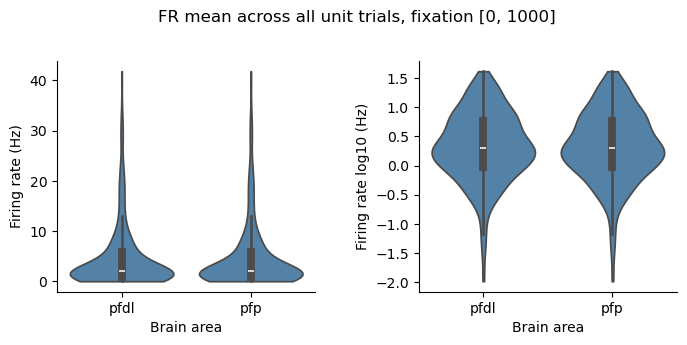

In [54]:
# plot with grouping per animal

fig, axes = plt.subplots(1, 2, figsize=(8,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='area', y='fr_hz', data=fr_mean_df, cut=0, density_norm='width', color='steelblue')
sns.violinplot(ax=axes[1], x='area', y='fr_hz_log10', data=fr_mean_df, cut=0, density_norm='width', color='steelblue')

axes[0].set_ylabel('Firing rate (Hz)')
axes[1].set_ylabel('Firing rate log10 (Hz)')

for ax in axes.flat:
    ax.set_xlabel('Brain area')

fig.suptitle('FR mean across all unit trials, fixation [0, 1000]', y=1.05)

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'fr_fixation_with_empty_1000.png' , bbox_inches='tight')
    plt.savefig(fig_folder + 'fr_fixation_with_empty_1000.svg' , bbox_inches='tight')